In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import LinAlgError
from scipy.stats import skew, kurtosis
from PIL import Image
Image.LOAD_TRUNCATED_IMAGES = True
import sys, os
import logging
import argparse, copy
import time
import sutils
import steerable_pyramid_mat as steerable
import texture_analysis_g as ta
import scipy.io
from pandas import DataFrame as df
import pandas as pd
logger = logging.getLogger()
logger.setLevel(level=50)

# memo

- parents 達はなぜ2倍位相にするのか これは学びたい

In [2]:
class my_arg:
    def __init__(self):
        #self.orig_img = "periodic/CountExamp1.o.jpg"
        #self.orig_img = "bark.jpg"      
        #self.orig_img="laby-05.jpg"
        self.orig_img="v=0.01,498.png"
        self.out_dir = "tmp"
        self.num_depth = 4
        self.num_ori = 4
        self.num_neighbor = 7
        self.iter = 100
args = my_arg()

arg = my_arg()
iter = arg.iter
orig_img = arg.orig_img
out_dir  = arg.out_dir
num_depth= arg.num_depth
num_ori  = arg.num_ori
num_neighbor = arg.num_neighbor

im = np.array(Image.open(args.orig_img).convert("L"))

resol_x = im.shape[1]
resol_y = im.shape[0]

__file__ = "aa"
LOG_FMT = "[%(name)s] %(asctime)s %(levelname)s %(lineno)s %(message)s"
logging.basicConfig(level=logging.DEBUG, format=LOG_FMT)
LOGGER = logging.getLogger(os.path.basename(__file__))

In [3]:
mat_data = scipy.io.loadmat("matlab/counter_not_noise.mat")

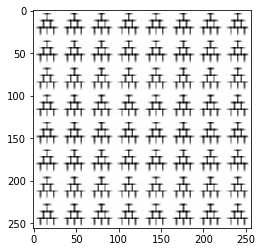

In [4]:
plt.imshow(mat_data["im0"],"gray")

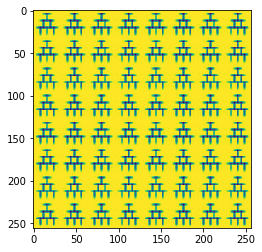

In [5]:
plt.imshow(mat_data["im0"])

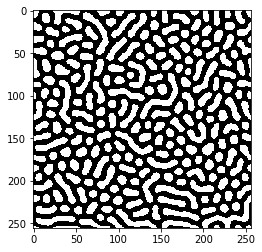

In [6]:
plt.imshow(im,"gray")

In [7]:
params = mat_data["params"]
params = params[0][0]

In [8]:
orig_data = ta.TextureAnalysis(im, resol_x, resol_y, arg.num_depth, arg.num_ori, arg.num_neighbor)
orig_data.analyse()

In [9]:
N = 4
K = 4
M = 7

In [10]:
params.dtype

dtype([('pixelStats', 'O'), ('pixelLPStats', 'O'), ('autoCorrReal', 'O'), ('autoCorrMag', 'O'), ('magMeans', 'O'), ('cousinMagCorr', 'O'), ('parentMagCorr', 'O'), ('cousinRealCorr', 'O'), ('parentRealCorr', 'O'), ('varianceHPR', 'O')])

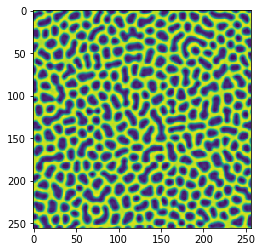

In [12]:
plt.imshow(im)

In [11]:
param_count = np.zeros([10])

# 0. pixelStats IM_MAR
$6$

 元画像輝度のmean,variance,skew,kurtosis,minimum,maximum 
 
- 等しい
- 互いに6次元

In [12]:
param_count[0] = 6
param_count #何次元か見よう

array([6., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [31]:
C0=df(orig_data.IM_MAR)
C0

,0
0,116.052704
1,16125.455466
2,0.180289
3,1.032474
4,255.000000
5,0.000000


In [171]:
df(orig_data)

ValueError: DataFrame constructor not properly called!

In [189]:
df(params[0])

,0,1,2,3,4,5
0,222.196289,3525.883435,-1.878269,5.57467,0.0,255.0


In [14]:
df(params[1])

,0,1
0,-1.788675,5.196226
1,-1.183097,3.371317
2,-0.588446,1.852543
3,-0.378953,2.621126
4,0.000000,3.000000


In [15]:
df(orig_data.IM_MAR)

,0
0,116.052704
1,16125.455466
2,0.180289
3,1.032474
4,255.000000
5,0.000000


# 1 pixelLPStats LR_MARとCF_MAR

$2(N+1)$

- 部分的に再構成されたローパス画像の歪度と尖度
- params[N+1][2]
- CF_MAR[N][2:4] + LR_MAR[2:4]

In [16]:
param_count[1] = 2 * (N+1)

In [17]:
df(params[1])

,0,1
0,-1.788675,5.196226
1,-1.183097,3.371317
2,-0.588446,1.852543
3,-0.378953,2.621126
4,0.000000,3.000000


In [54]:
params[1]

array([[-1.78867497,  5.19622616],
       [-1.1830971 ,  3.37131656],
       [-0.58844577,  1.85254283],
       [-0.37895258,  2.62112578],
       [ 0.        ,  3.        ]])

In [32]:
df(orig_data.LR_MAR)


,0
0,-2.842171e-14
1,1.387733e+06
2,4.170110e-02
3,2.505126e+00
4,3.348244e+03
5,-2.537172e+03


In [33]:
df(orig_data.CF_MAR)

,0,1,2,3,4,5
0,6.661338e-16,1.477451e+04,0.181898,1.214258,194.157074,-165.060192
1,-6.661338e-16,2.088828e+05,0.155861,1.471442,834.704345,-636.260087
2,4.440892e-15,1.948701e+06,0.477749,2.119764,3919.274964,-2512.091015
3,3.552714e-15,6.128767e+05,0.317693,2.714363,2713.689770,-2050.145150


In [14]:
df(params[1]).T

,0,1,2,3,4
0,-1.788675,-1.183097,-0.588446,-0.378953,0.0
1,5.196226,3.371317,1.852543,2.621126,3.0


In [106]:
df(np.array(orig_data.CF_MAR)[2:4]).T

,0,1
0,1.776357e-15,0.000000
1,9.166787e+05,340927.239091
2,-4.983245e-01,-0.235042
3,2.456946e+00,3.623831
4,2.273332e+03,1830.539829
5,-2.704724e+03,-2692.136875


In [111]:
np.array(orig_data.CF_MAR)[:,2:4]

array([[-0.24820909,  1.47597612],
       [-0.28732091,  1.64383529],
       [-0.49832453,  2.4569462 ],
       [-0.23504241,  3.62383115]])

In [24]:
cfmar=np.array(orig_data.CF_MAR)[:,2:4]
df(np.array(orig_data.CF_MAR)[:,2:4])


,0,1
0,0.181898,1.214258
1,0.155861,1.471442
2,0.477749,2.119764
3,0.317693,2.714363


In [23]:
lrmar=np.array(orig_data.LR_MAR)[2:4]
df(np.array(orig_data.LR_MAR)[2:4])

,0
0,0.041701
1,2.505126


In [25]:
C1=np.vstack((cfmar,lrmar))  
df(C1)

,0,1
0,0.181898,1.214258
1,0.155861,1.471442
2,0.477749,2.119764
3,0.317693,2.714363
4,0.041701,2.505126


# 2 autoCorrReal  CF_CA and LR_CA
$(N+1) * \frac{(M^2+1)}{2}$

各スケールで部分的に再構成されたローパス画像の自己相関のM*M

- params[2] = [M,M,N+1] 
- CF_CF[N,M,M] (CF_CA?) + LR_CA[M,M]

In [26]:
param_count[2] = (N+1) * (M**2 + 1)/2

In [27]:
print(params[2].shape)

(7, 7, 5)


In [28]:
df(params[2][:,:,4]) # 4 = LR_CA

,0,1,2,3,4,5,6
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
df(orig_data.CF_CA[4])

IndexError: list index out of range

In [40]:
len(orig_data.CF_CA)

4

In [43]:
df(orig_data.LR_CA)

,0,1,2,3,4,5,6
0,73153.215162,-3504.887829,-97484.167076,-9.983896e+04,57930.076271,188862.333073,141314.461070
1,-5725.391762,-132517.401636,-210365.752832,-2.342975e+05,-214118.799816,-134960.411641,-55772.108990
2,2051.809294,-22938.534124,257701.024187,4.381591e+05,130632.971586,-172278.503648,-122195.995351
3,15070.603898,67450.592171,630983.489873,1.054721e+06,630983.489873,67450.592171,15070.603898
4,-122195.995351,-172278.503648,130632.971586,4.381591e+05,257701.024187,-22938.534124,2051.809294
5,-55772.108990,-134960.411641,-214118.799816,-2.342975e+05,-210365.752832,-132517.401636,-5725.391762
6,141314.461070,188862.333073,57930.076271,-9.983896e+04,-97484.167076,-3504.887829,73153.215162


In [41]:
len(orig_data.LR_CA)

7

In [156]:
df(orig_data.CF_CA[1])

,0,1,2,3,4,5,6
0,-63899.832829,-68255.017725,-50929.121671,-34416.614279,-35933.799682,-49942.923266,-56370.691787
1,-62188.094051,-29129.547716,24246.411902,54288.717978,34484.355408,-17509.519284,-59390.816752
2,-46168.650250,25223.953319,114454.241015,157668.345531,119479.499310,30569.301704,-45724.113700
3,-37163.189996,52239.522481,157004.265278,204590.934859,157004.265278,52239.522481,-37163.189996
4,-45724.113700,30569.301704,119479.499310,157668.345531,114454.241015,25223.953319,-46168.650250
5,-59390.816752,-17509.519284,34484.355408,54288.717978,24246.411902,-29129.547716,-62188.094051
6,-56370.691787,-49942.923266,-35933.799682,-34416.614279,-50929.121671,-68255.017725,-63899.832829


In [41]:
df(orig_data.LR_CA)

,0,1,2,3,4,5,6
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
a = copy.copy(orig_data.LR["s"])

In [23]:
a = a - a.mean()

In [24]:
np.dot(a.flatten(),a.flatten())/256

6.309180055109966

In [ ]:
#配列同士の足し算をやる必要がアリ

# 3.autoCorrMag  BND_MCOR

$N*K*\frac{M^2 + 1}{2}$

- 各サブバンドの画像の絶対値の自己相関の中央サンプルM*M
- pythonとちがう
- params[3] = [M,M,N,K]
- BND_MCOR[N,K,M,M]

In [22]:
param_count[3] =  N * K * (M**2 + 1)/2

In [23]:
params[3].shape

(7, 7, 4, 4)

In [36]:
df(params[3][:,:,3,3])

,0,1,2,3,4,5,6
0,-73227.818255,-22673.392442,73490.827326,21873.307536,-73227.818255,-22673.392442,73490.827326
1,-58590.259804,-13493.292950,-58590.259804,-108013.223438,-58590.259804,-13493.292950,-58590.259804
2,73490.827326,-22673.392442,-73227.818255,21873.307536,73490.827326,-22673.392442,-73227.818255
3,57859.227677,-43113.416297,57859.227677,167156.148610,57859.227677,-43113.416297,57859.227677
4,-73227.818255,-22673.392442,73490.827326,21873.307536,-73227.818255,-22673.392442,73490.827326
5,-58590.259804,-13493.292950,-58590.259804,-108013.223438,-58590.259804,-13493.292950,-58590.259804
6,73490.827326,-22673.392442,-73227.818255,21873.307536,73490.827326,-22673.392442,-73227.818255


In [25]:
df(orig_data.BND_MCOR[0][3])

,0,1,2,3,4,5,6
0,32.275510,46.987519,55.479584,48.350316,45.058760,52.647792,54.017337
1,44.306377,54.969662,49.968426,49.786908,62.913680,67.311390,49.744653
2,51.482141,48.583728,50.652037,69.022746,78.797208,60.371556,40.788573
3,44.255469,47.265978,67.947749,83.593219,67.947749,47.265978,44.255469
4,40.788573,60.371556,78.797208,69.022746,50.652037,48.583728,51.482141
5,49.744653,67.311390,62.913680,49.786908,49.968426,54.969662,44.306377
6,54.017337,52.647792,45.058760,48.350316,55.479584,46.987519,32.275510


# 4.magMeans BND_MMAR

$N*K$

- 各スケール，各サブバンドにおける絶対値の平均値
- 絶対値がらみはpythonと違うっぽい

- params[4] = [18,1] L0 と H0が含まれているため

- BND_MMAR[N,K][6] [0]を抜き出すことになる 

In [41]:
param_count[4] = N * K

In [33]:
params[4].shape #H0 とL0 が含まれているため． 16 + 2

(18, 1)

In [35]:
df(params[4])

,0
0,4.435796
1,15.905867
2,10.578279
3,17.216369
4,10.506390
5,75.203904
6,70.016965
7,99.547751
8,70.080087
9,205.689338


In [36]:
df(params[4].reshape(1,-1))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,4.435796,15.905867,10.578279,17.216369,10.50639,75.203904,70.016965,99.547751,70.080087,205.689338,201.268502,190.69826,202.384063,1939.93547,900.692604,1499.85524,901.687745,0.0


In [32]:
df(orig_data.BND_MMAR[0])

,0,1,2,3,4,5
0,24.265939,286.169930,0.829462,2.959263,93.151924,0.068798
1,24.368912,255.159040,0.706487,2.709609,89.789804,0.036614
2,23.675161,283.219443,0.868445,3.072689,100.735965,0.032865
3,23.993751,251.906141,0.712795,2.708959,76.565453,0.076209


In [34]:
len(params[4])

18

In [37]:
params[4].reshape(-1)[1:17] - np.array(orig_data.BND_MMAR)[:,:,0].flatten()

array([  -8.36007216,  -13.79063291,   -6.45879248,  -13.48736139,
        -86.44262494,  -90.40925857,  -59.68439233,  -86.12570193,
       -813.43459231, -771.00179961, -778.11747303, -781.83825543,
       1253.44132258,  226.73573849,  851.40818986,  228.32002672])

# 5.Cousin mag corr  　 CF_COUS
$ N * \frac{K*(K-1)}{2}$

各スケールにおける，各サブバンド対の絶対値の相互相関

- params[5] = [K,K,(N+1)]
  - params[5][:,:,4] は0であることに注意
  
- CF_COUS[N,K,K]
- 値はpythonのものとやっぱり違いそう

- CF_COUS[]

In [44]:
param_count[5] = N*(K*(K-1))/2

In [13]:
params[5].shape

(4, 4, 5)

In [12]:
df(params[5][:,:,0])

,0,1,2,3
0,291.146634,113.470724,155.303083,114.911218
1,113.470724,82.860927,113.191491,62.190996
2,155.303083,113.191491,256.873193,114.427254
3,114.911218,62.190996,114.427254,83.593219


In [14]:
df(orig_data.CF_COUS[0])

,0,1,2,3
0,286.165564,60.324794,-98.995476,63.779399
1,60.324794,255.155147,64.603937,-73.591882
2,-98.995476,64.603937,283.215122,64.145587
3,63.779399,-73.591882,64.145587,251.902297


In [15]:
orig_data.CF_COUS

[array([[286.1655636 ,  60.32479356, -98.99547574,  63.77939946],
        [ 60.32479356, 255.1551469 ,  64.60393741, -73.59188203],
        [-98.99547574,  64.60393741, 283.21512179,  64.14558718],
        [ 63.77939946, -73.59188203,  64.14558718, 251.90229684]]),
 array([[ 6888.04741822,  1234.14307953, -2742.03727332,  1349.78401667],
        [ 1234.14307953,  6956.60719017,  1665.85466194, -2474.45144783],
        [-2742.03727332,  1665.85466194,  7500.23241608,  1526.5996827 ],
        [ 1349.78401667, -2474.45144783,  1526.5996827 ,  6813.00628736]]),
 array([[164668.83785447,  -6900.67343292, -61754.4071165 ,
          -8059.99509691],
        [ -6900.67343292, 148785.11807294,   7719.1693221 ,
         -44724.70326237],
        [-61754.4071165 ,   7719.1693221 , 154372.674007  ,
          -4893.15754919],
        [ -8059.99509691, -44724.70326237,  -4893.15754919,
         148311.79540121]]),
 array([[165619.0100511 ,  57553.85129656,   6882.72935704,
          51598.11306081],

# 6 Parent mag corr CF_CPAR 
$ K^2 (N-1)$

各スケールのサブバンドとより粗いスケールのサブバンドの絶対値の相互相関 

- params[6] = [4,4,4]
  - params[6][:,:,3] は0であることに注意する．(だからk×k×"(N-1)")
  
- CF_CPAR[N-1,K,K]


In [98]:
print(N)
print(K)

4
4


In [57]:
param_count[6] = K*K*(N-1)

In [58]:
print(params[6].shape)

(4, 4, 4)


In [66]:
df(params[6][:,:,0])

,0,1,2,3
0,230.698864,132.166117,250.599169,133.453404
1,88.965625,86.015743,152.976511,85.064158
2,108.101176,178.015111,317.224644,180.898188
3,88.312365,84.960863,154.351582,88.248952


In [37]:
params[6][:,:,2] 

array([[ -255.28144269,  -693.78201858,   365.79206368,  -667.8428384 ],
       [ -917.39776878,   366.49453824,   685.1201131 , -3839.98288069],
       [ -415.30316037,   438.92788783,  1858.95282783,   385.9191696 ],
       [ -933.5019696 , -3807.6488457 ,   799.50019379,   398.07434534]])

In [155]:
df(orig_data.CF_CPAR[0])

,0,1,2,3
0,41.977594,8.164597,-26.187211,11.764531
1,3.142856,26.914816,7.777220,-9.225393
2,-26.773409,12.911272,46.128677,10.988991
3,5.561266,-8.855623,5.914451,28.295538


# 7 Cousin real corr CF_RCOU
$ N \frac{K(K-1)}{2}$

各スケールにおける，各サブバンド対の実数の相互相関

- params[7] = [8,8,5]
  - 8 * 8の行列であるが，4 * 4しか使っていないことに注意
  - 配列が5個あるのが謎である．．最下層のスケールにバンドでもあんの？？
 
- CF_RCOU[N,K,K]

In [67]:
param_count[7] = N*(K*(K-1))/2

In [144]:
params[7].shape

(8, 8, 5)

In [74]:
df(params[7][:,:,4])

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
df(params[7][:,:,1])

,0,1,2,3,4,5,6,7
0,5111.592060,2670.658866,-1.883743,-2702.105321,0.0,0.0,0.0,0.0
1,2670.658866,4069.026793,3534.701210,600.994765,0.0,0.0,0.0,0.0
2,-1.883743,3534.701210,8715.050679,3534.368210,0.0,0.0,0.0,0.0
3,-2702.105321,600.994765,3534.368210,4098.562139,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
6,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
7,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [102]:
df(params[7][:,:,4])

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
orig_data.CF_RCOU

[array([[ 40.88714119,  20.24906216,   0.06916352, -20.33255711],
        [ 20.24906216,  31.64771412,  21.42944156,   0.20817909],
        [  0.06916352,  21.42944156,  42.91433751,  20.84144574],
        [-20.33255711,   0.20817909,  20.84144574,  31.01432966]]),
 array([[10291.49308202,  5837.55126548,    88.86830776, -5670.55371187],
        [ 5837.55126548, 10358.51290795,  5824.30218482,   -49.1879487 ],
        [   88.86830776,  5824.30218482,  9781.08335425,  5240.21855165],
        [-5670.55371187,   -49.1879487 ,  5240.21855165,  9471.95160332]]),
 array([[ 290888.90788975,  156225.45821949,    1384.67006339,
         -163698.71364897],
        [ 156225.45821949,  280752.91536076,  166096.2314928 ,
           -1219.43680539],
        [   1384.67006339,  166096.2314928 ,  282764.46902388,
          149236.49534849],
        [-163698.71364897,   -1219.43680539,  149236.49534849,
          268577.1195589 ]]),
 array([[110217.62118737,  65664.30402669,   1800.21169045,
         -

In [150]:
df(orig_data.CF_RCOU[3])

,0,1,2,3
0,110217.621187,65664.304027,1800.211690,-63466.500571
1,65664.304027,133588.564413,82794.295887,2582.296035
2,1800.211690,82794.295887,134270.602252,65744.885894
3,-63466.500571,2582.296035,65744.885894,112777.992850


# 8. parent real corr CF_RPAR
$2*K^2 (N-1)$

 クロススケール位相特性
 各スケールの実数成分と．1つ粗いスケールで位相を二倍した実数及び虚数との相互相関

- params[8] = [2K,2K,(N)]
 - なぜ4まであるか謎である．
 - (8*8)であるが実際は(4,8)しか使ってない．
 
- CF_RPAR[N-1,K,2K]

In [75]:
param_count[8] = 2*K*K*(N-1)

In [76]:
print(params[8].shape)

(8, 8, 4)


In [79]:
complex(1,1)

(1+1j)

In [84]:
df(params[8][:,:,3])

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
df(params[8][:,:,0])

,0,1,2,3,4,5,6,7
0,-0.274169,-12.740980,0.033659,13.376169,-236.682681,-36.909000,0.043019,36.421500
1,1.964587,-1.388622,15.581706,7.221945,-86.342237,-54.504708,-121.444222,-0.585473
2,-0.109025,12.742947,38.682365,11.703133,-0.142504,-48.797796,-331.212404,-49.079467
3,2.135205,7.012995,14.898269,-3.043267,84.913992,-0.727937,-120.974464,-55.701965
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [104]:
df(params[8][:,:,3])

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [205]:
df(orig_data.CF_RPAR[0])

,0,1,2,3,4,5,6,7
0,2.305838,4.211626,-0.465431,1.023409,6.528208,3.563802,0.120226,-1.666909
1,3.394071,0.052722,-2.108293,0.093696,4.709058,0.238000,3.409641,-0.482498
2,0.849657,-2.507794,-1.876144,-1.848674,-0.116666,1.029924,1.797830,-1.232055
3,0.519854,0.284088,0.224070,-2.524632,-3.212735,0.141050,2.599781,-0.482368


In [47]:
df(orig_data.CF_RPAR[0])

,0,1,2,3,4,5,6,7
0,-0.279413,-12.743050,0.033114,13.382287,-236.684696,-36.918687,0.043763,36.421820
1,1.959431,-1.397172,15.590301,7.222181,-86.347459,-54.497611,-121.453854,-0.586351
2,-0.110661,12.741273,38.705585,11.697919,-0.143422,-48.794324,-331.249658,-49.093549
3,2.134928,7.012429,14.905339,-3.060979,84.908520,-0.727379,-120.991871,-55.716491


# 9.variance HPR  orig_data.H0_PRO
$1$

h0の分散．
- 一緒っぽい

In [85]:
param_count[9] = 1

In [88]:
df(params[9])

,0
0,41.85842


In [89]:
orig_data.H0_PRO

24.65669148477151

In [90]:
orig_data.H0_PRO

24.65669148477151

In [94]:
#MATLABでやった方がよさそう
#params[1].to_csv("test.csv")
#N=4
#K=4
#M=7
#for i in range(N+1):
    #np.savetxt('out2/out2_+str(i)+.csv',params[2][:,:,1],delimiter=',')
#np.savetxt('out/out1/out1_1枚目.csv',params[1],delimiter=',')
np.savetxt('out/C1/out0_1枚目.csv',df(orig_data.IM_MAR),delimiter=',')
    
np.savetxt('out/C2/out1_1枚目_N+1=1.csv',params[2][:,:,1],delimiter=',')
np.savetxt('out/C2/out1_1枚目_N+1=2.csv',params[2][:,:,2],delimiter=',')
np.savetxt('out/C2/out1_1枚目_N+1=3.csv',params[2][:,:,3],delimiter=',')
np.savetxt('out/C2/out1_1枚目_N+1=4.csv',params[2][:,:,4],delimiter=',')
np.savetxt('out/C2/out1_1枚目_N+1=0.csv',params[2][:,:,0],delimiter=',')

np.savetxt('out/C3/out2_1枚目_N+1=1.csv',df(orig_data.CF_CA[0]),delimiter=',')

np.savetxt('out/C4/out3_1枚目_N=0,K=0.csv',params[3][:,:,0,0],delimiter=',')
np.savetxt('out/C4/out3_1枚目_N=0,K=1.csv',params[3][:,:,0,1],delimiter=',')
np.savetxt('out/C4/out3_1枚目_N=0,K=2.csv',params[3][:,:,0,2],delimiter=',')
np.savetxt('out/C4/out3_1枚目_N=0,K=3.csv',params[3][:,:,0,3],delimiter=',')
np.savetxt('out/C4/out3_1枚目_N=1,K=0.csv',params[3][:,:,1,0],delimiter=',')
np.savetxt('out/C4/out3_1枚目_N=1,K=1.csv',params[3][:,:,1,1],delimiter=',')
np.savetxt('out/C4/out3_1枚目_N=1,K=2.csv',params[3][:,:,1,2],delimiter=',')
np.savetxt('out/C4/out3_1枚目_N=1,K=3.csv',params[3][:,:,1,3],delimiter=',')
np.savetxt('out/C4/out3_1枚目_N=2,K=0.csv',params[3][:,:,2,0],delimiter=',')
np.savetxt('out/C4/out3_1枚目_N=2,K=1.csv',params[3][:,:,2,1],delimiter=',')
np.savetxt('out/C4/out3_1枚目_N=2,K=2.csv',params[3][:,:,2,2],delimiter=',')
np.savetxt('out/C4/out3_1枚目_N=2,K=3.csv',params[3][:,:,2,3],delimiter=',')
np.savetxt('out/C4/out3_1枚目_N=3,K=0.csv',params[3][:,:,3,0],delimiter=',')
np.savetxt('out/C4/out3_1枚目_N=3,K=1.csv',params[3][:,:,3,1],delimiter=',')
np.savetxt('out/C4/out3_1枚目_N=3,K=2.csv',params[3][:,:,3,2],delimiter=',')
np.savetxt('out/C4/out3_1枚目_N=3,K=3.csv',params[3][:,:,3,3],delimiter=',')

#np.savetxt('out/C5/out4_1枚目.csv',params[4],delimiter=',')
#df(orig_data.BND_MMAR[0])
np.savetxt('out/C5/out4_1枚目.csv',df(orig_data.BND_MMAR[0]),delimiter=',')
np.savetxt('out/C5/out4_1枚目.csv',df(orig_data.BND_MMAR[1]),delimiter=',')
np.savetxt('out/C5/out4_1枚目.csv',df(orig_data.BND_MMAR[2]),delimiter=',')
np.savetxt('out/C5/out4_1枚目.csv',df(orig_data.BND_MMAR[3]),delimiter=',')

np.savetxt('out/C6/out5_1枚目_N+1=0.csv',orig_data.CF_COUS[0],delimiter=',')
np.savetxt('out/C6/out5_1枚目_N+1=1.csv',orig_data.CF_COUS[1],delimiter=',')
np.savetxt('out/C6/out5_1枚目_N+1=2.csv',orig_data.CF_COUS[2],delimiter=',')
np.savetxt('out/C6/out5_1枚目_N+1=3.csv',orig_data.CF_COUS[3],delimiter=',')
np.savetxt('out/C6/out5_1枚目_N+1=4.csv',orig_data.CF_COUS[4],delimiter=',')

np.savetxt('out/C7/out6_1枚目_N=1.csv',df(orig_data.CF_CPAR[0]),delimiter=',')
np.savetxt('out/C7/out6_1枚目_N=2.csv',df(orig_data.CF_CPAR[1]),delimiter=',')
np.savetxt('out/C7/out6_1枚目_N=3.csv',df(orig_data.CF_CPAR[2]),delimiter=',')
np.savetxt('out/C7/out6_1枚目_N=4.csv',df(orig_data.CF_CPAR[3]),delimiter=',')

np.savetxt('out/C8/out7_1枚目_.csv',df(orig_data.CF_RCOU[0]),delimiter=',')
np.savetxt('out/C8/out7_1枚目_.csv',df(orig_data.CF_RCOU[1]),delimiter=',')
np.savetxt('out/C8/out7_1枚目_.csv',df(orig_data.CF_RCOU[2]),delimiter=',')
np.savetxt('out/C8/out7_1枚目_.csv',df(orig_data.CF_RCOU[3]),delimiter=',')

np.savetxt('out/C9/out8_1枚目_N=0.csv',df(orig_data.CF_RPAR[0]),delimiter=',')
np.savetxt('out/C9/out8_1枚目_N=1.csv',df(orig_data.CF_RPAR[1]),delimiter=',')
np.savetxt('out/C9/out8_1枚目_N=2.csv',df(orig_data.CF_RPAR[2]),delimiter=',')
np.savetxt('out/C9/out8_1枚目_N=3.csv',df(orig_data.CF_RPAR[3]),delimiter=',')

np.savetxt('out/C10/out9_1枚目.csv',df(orig_data.H0_PRO),delimiter=',')